In [1]:
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random

import warnings
warnings.filterwarnings('ignore')



Using TensorFlow backend.


In [10]:
#Example of  Spectogram 
y, sr = librosa.load('LibriSpeech/84/121123/84-121123-0000.flac', duration = 2.97)
ps = librosa.feature.melspectrogram(y = y, sr = sr)
ps.shape

(128, 91)

In [12]:
#Example of  Spectogram 
y, sr = librosa.load('LibriSpeech/84/121123/84-121123-0001.flac', duration = 2.97)
ps = librosa.feature.melspectrogram(y = y, sr = sr)
ps.shape

(128, 128)

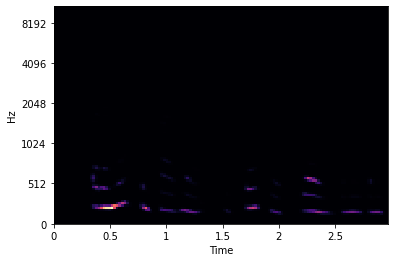

In [13]:
librosa.display.specshow(ps, y_axis = 'mel', x_axis = 'time')

In [14]:
#Play audio 
from IPython.display import Audio, display, clear_output

display(Audio(y, rate=sr, autoplay=False))

In [30]:
from os import listdir
from os.path import isfile, join

Speakers = [84, 174, 251, 422, 652, 777, 1272, 1462, 1673, 1919]
Speakers_filename = [];
for i in Speakers:
    Speakers_filename.append([f for f in listdir('LibriSpeech/'+ str(i) ) if f.endswith('.flac')  if isfile(join('LibriSpeech/'+ str(i), f))]) 


In [67]:
D = [] # Dataset

for i in range(10):
    for j in Speakers_filename[i]:
        y, sr = librosa.load('LibriSpeech/' + str(Speakers[i]) + '/'+ str(j) , duration=2.97)  
        ps = librosa.feature.melspectrogram(y=y, sr=sr)
        if ps.shape != (128, 128): continue
        D.append( (ps, i) )
   


In [68]:
import keras
dataset = D
random.shuffle(dataset)
train = dataset[:450]
test = dataset[450:]
    
X_train, Y_train = zip(*train)
X_test, Y_test = zip(*test)

# Reshape for CNN input
X_train = np.array([x.reshape( (128, 128, 1) ) for x in X_train])
X_test = np.array([x.reshape( (128, 128, 1) ) for x in X_test])
print (Y_test)


# One-Hot encoding for classes
Y_train = np.array(keras.utils.to_categorical(Y_train,10))
Y_test = np.array(keras.utils.to_categorical(Y_test,10))


(0, 8, 0, 5, 6, 6, 8, 9, 6, 5, 9, 0, 6, 7, 5, 9, 2, 6, 2, 1, 5, 8, 3, 8, 9, 4, 5, 2, 4, 6, 9, 1, 0, 2, 2, 9, 8, 8, 2, 1, 6, 7, 4, 8, 4, 7, 6, 4, 4, 4, 7, 2, 9, 1, 7, 0, 5, 4, 8, 5, 4, 1, 3, 5, 7, 9, 8, 1, 9, 0, 7, 3, 6, 9, 4, 2, 9, 0, 2, 8, 0, 3, 2, 5, 8, 6, 7, 1, 7, 5, 9, 7, 8, 2, 5, 9, 5, 4, 0, 8, 6, 8, 4, 3, 1, 4, 7, 0, 2, 0, 2, 1, 4, 5)


In [69]:
model = Sequential()
input_shape=(128, 128, 1)

model.add(Conv2D(24, (5, 5), strides=(1, 1), input_shape=input_shape))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(MaxPooling2D((4, 2), strides=(4, 2)))
model.add(Activation('relu'))

model.add(Conv2D(48, (5, 5), padding="valid"))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

In [71]:
model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy'])

model.fit(
    x=X_train, 
    y=Y_train,
    epochs=50,
    batch_size=128,
    validation_data= (X_test, Y_test))

score = model.evaluate(
    x=X_test,
    y=Y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 450 samples, validate on 114 samples
Epoch 1/50
450/450 [==============================] - 4s 9ms/step - loss: 1.6411 - accuracy: 0.3867 - val_loss: 1.5737 - val_accuracy: 0.4561
Epoch 2/50
450/450 [==============================] - 4s 8ms/step - loss: 1.5273 - accuracy: 0.4400 - val_loss: 1.4482 - val_accuracy: 0.4649
Epoch 3/50
450/450 [==============================] - 4s 8ms/step - loss: 1.4335 - accuracy: 0.4644 - val_loss: 1.4526 - val_accuracy: 0.5351
Epoch 4/50
450/450 [==============================] - 4s 9ms/step - loss: 1.4765 - accuracy: 0.4733 - val_loss: 1.3484 - val_accuracy: 0.5175
Epoch 5/50
450/450 [==============================] - 4s 8ms/step - loss: 1.3181 - accuracy: 0.5356 - val_loss: 1.3809 - val_accuracy: 0.5526
Epoch 6/50
450/450 [==============================] - 4s 8ms/step - loss: 1.2240 - accuracy: 0.5956 - val_loss: 1.3185 - val_accuracy: 0.5614
Epoch 7/50
450/450 [==============================] - 4s 8ms/step - loss: 1.1607 - accuracy: 0.5622 - 